In [1]:
!pip install qiskit qiskit_aer pylatexenc --quiet

from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 71.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 78.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 63.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.7 MB/s eta 0:00:00


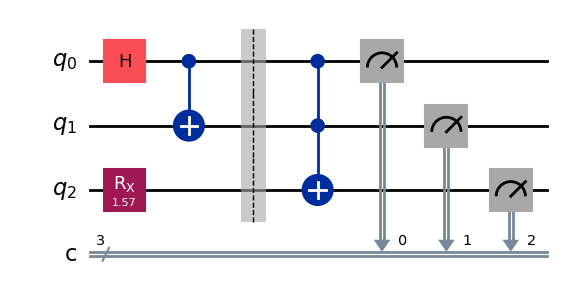

In [2]:
qc = QuantumCircuit(3,3)
qc.h(0)
qc.cx(0,1)
qc.rx(1.57,2)
qc.barrier()
qc.ccx(0,1,2)
qc.measure([0,1,2],[0,1,2])
display(qc.draw('mpl'))


In [4]:
from qiskit.qasm3 import dumps
qasm_code = dumps(qc)
print(qasm_code)



OPENQASM 3.0;
include "stdgates.inc";
bit[3] c;
qubit[3] q;
h q[0];
cx q[0], q[1];
rx(1.57) q[2];
barrier q[0], q[1], q[2];
ccx q[0], q[1], q[2];
c[0] = measure q[0];
c[1] = measure q[1];
c[2] = measure q[2];



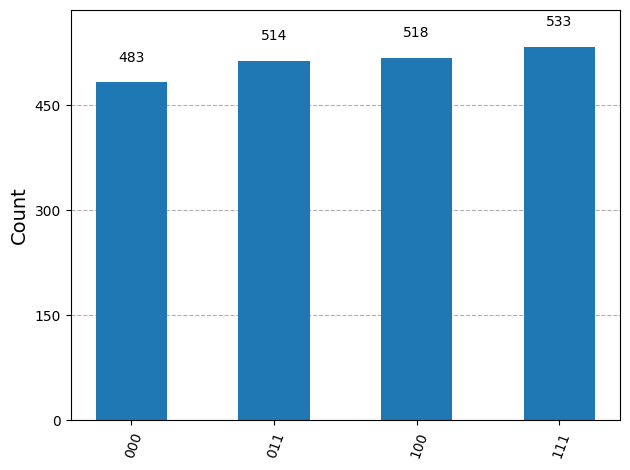

In [5]:
sim = AerSimulator()
tqc = transpile(qc, sim)
res = sim.run(tqc, shots=2048).result()
counts = res.get_counts()
display(plot_histogram(counts))


In [6]:
print('Hadamard gate in QASM: h q[0];')
print('CNOT gate in QASM: cx q[0],q[1];')


Hadamard gate in QASM: h q[0];
CNOT gate in QASM: cx q[0],q[1];
